# Test the random attacker in the little environment

-   initialisation of the environment
-   initialisation of the random agent

In [1]:
from cyberbattle.agents.battle_environment import CyberBattleEnv
from cyberbattle.agents.attacker.attacker_interface import AttackerGoal
from cyberbattle.env.samples.little_network import get_little_environment_network, Dev, DSI

num_client = 5
net = get_little_environment_network(num_client)
profiles = {
    DSI(num_client): 1,
    Dev(num_client): num_client - 1
}
env = CyberBattleEnv(net, profiles, attacker_goal=AttackerGoal(nb_flag=2))

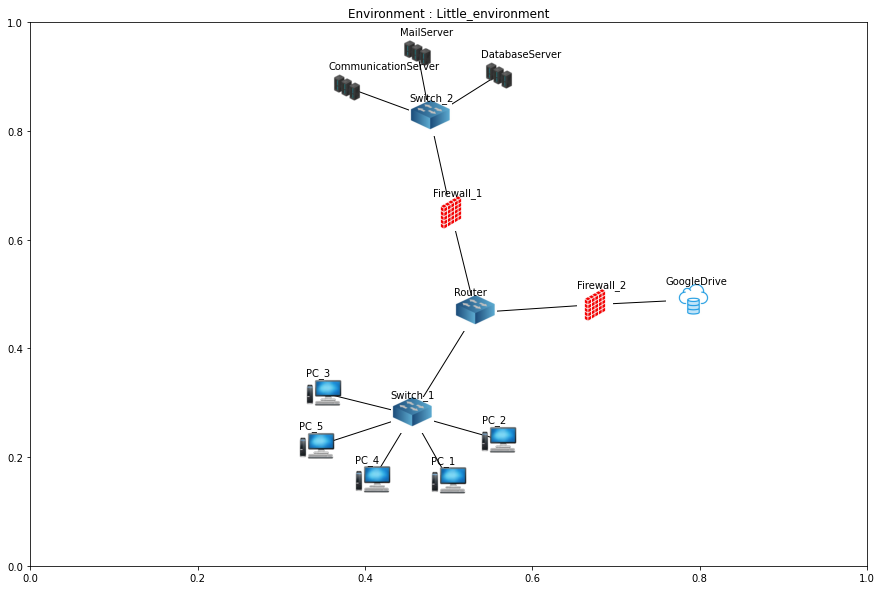

In [2]:
env.display_network()

In [3]:
env.attacker_description()

The attacker can performed the following attacks classified by their index :
{0: 'File and Directory Discovery', 1: 'Browser Session Hijacking', 2: 'Network Service Scanning', 3: 'Private Keys', 4: 'Forge Web Credentials'}

These attacks can be performed and allow the attacker to get outcomes as follows :
{'PC_1': {}, 'PC_2': {}, 'PC_3': {}, 'PC_4': {'File and Directory Discovery': {'data sources triggered': 'Process', 'phase name': 'discovery', 'Type': 'Local'}}, 'PC_5': {'Private Keys': {'data sources triggered': 'File', 'phase name': 'credential-access', 'Type': 'Remote'}}, 'Switch_1': {}, 'Switch_2': {}, 'Router': {}, 'DatabaseServer': {'Browser Session Hijacking': {'data sources triggered': 'Process', 'phase name': 'collection', 'Type': 'Local'}}, 'MailServer': {'Network Service Scanning': {'data sources triggered': 'Cloud Service', 'phase name': 'discovery', 'Type': 'Local'}}, 'CommunicationServer': {}, 'GoogleDrive': {'Forge Web Credentials': {'data sources triggered': 'Logon Se

In [4]:
from cyberbattle.agents.attacker.baseline.random import RandomAgent
from cyberbattle.agents.simulation import Simulation

random_agent = RandomAgent(name='test_random')

simulation = Simulation(env)
simulation.compile(training_method='epsilon greedy search', simulation_type='Agent vs Nothing')

Training the agent test_random
with parameters : uniform
against nothing.
Epsilon greedy search parameters : max_iteration=500, epochs=10 and epsilon=0.9.

Epoch : 1/10, epsilon = 0.9
500/500 [==============================] - 0s 141us/iteration - cumulate rewards: -9235.0 - succesful actions count: 7 - failed actions count: 385 - infected machines count: 3 - model loss: None               

Epoch ended at 401 iterations - Exploit deflected to explore count : 0 - Submarine action count : 9. 

###################

Epoch : 2/10, epsilon = 0.606584840971719
500/500 [==============================] - 0s 23us/iteration - cumulate rewards: 4280.0 - succesful actions count: 7 - failed actions count: 75 - infected machines count: 3 - model loss: None             

Epoch ended at 86 iterations - Exploit deflected to explore count : 0 - Submarine action count : 4. 

###################

Epoch : 3/10, epsilon = 0.5579705051202138
500/500 [==============================] - 0s 53us/iteration - cumu

c:\Users\EmilienGRILLOT\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\EmilienGRILLOT\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


500/500 [==============================] - 0s 110us/iteration - cumulate rewards: -12014.0 - succesful actions count: 7 - failed actions count: 438 - infected machines count: 3 - model loss: None              

Epoch ended at 463 iterations - Exploit deflected to explore count : 0 - Submarine action count : 18. 

###################

Epoch : 8/10, epsilon = 0.14324925375948047
500/500 [==============================] - 0s 66us/iteration - cumulate rewards: -3451.0 - succesful actions count: 7 - failed actions count: 254 - infected machines count: 3 - model loss: None           

Epoch ended at 276 iterations - Exploit deflected to explore count : 0 - Submarine action count : 15. 

###################

Epoch : 9/10, epsilon = 0.11121241859623118
500/500 [==============================] - 0s 77us/iteration - cumulate rewards: -6578.0 - succesful actions count: 7 - failed actions count: 336 - infected machines count: 3 - model loss: None           

Epoch ended at 350 iterations - Exploit

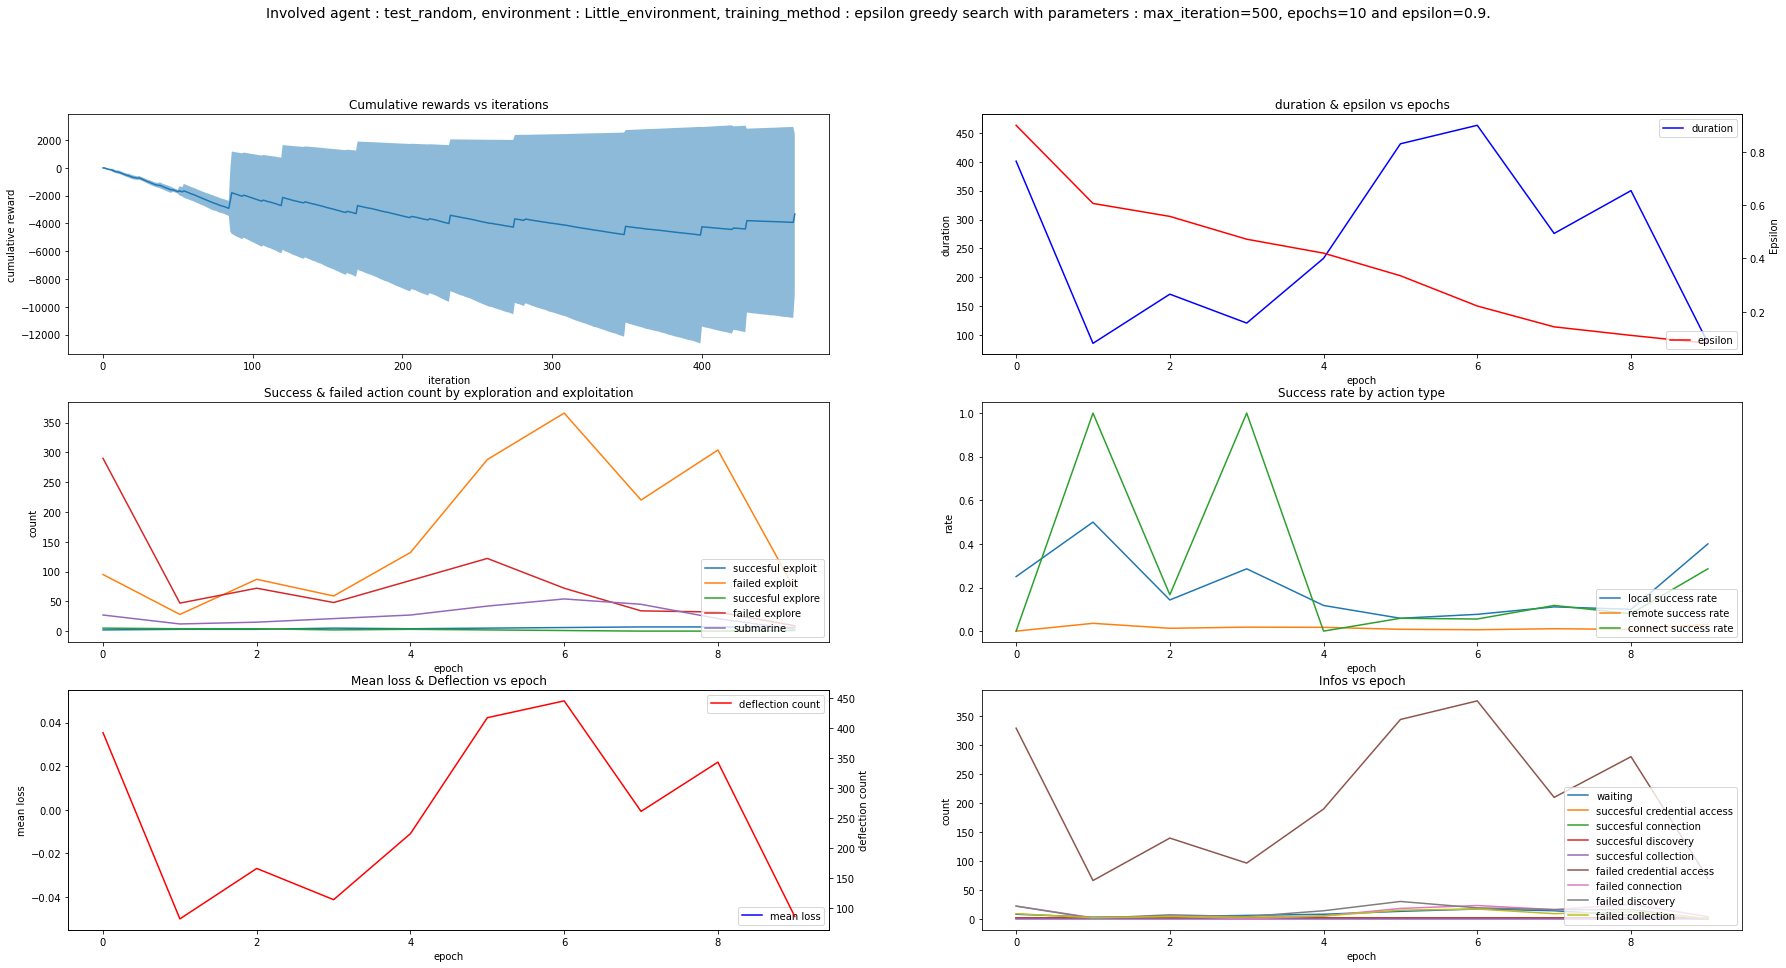

In [5]:
simulation.run(
    max_iteration=500,
    epochs=10,
    attacker=random_agent,
    verbose=1
)